In [2]:
# EDA of audio sample to see limits of accuracy of DFT and FFT in python3 
# and identify the limits of audio resolution produced by common recording 
# media (presumably predominantly mobile phones)

In [3]:
# link to audio sample: https://xeno-canto.org/824126
# name: XC824126-Agapornis-swindernianus.mp3

In [4]:
# read in audio sample
import wave
audio_sample = wave.open('XC824126-Agapornis-swindernianus.wav')

In [5]:
# check audio parameters
sample_rate = audio_sample.getframerate()
number_channels = audio_sample.getnchannels()
number_samples = audio_sample.getnframes()
duration = number_samples / sample_rate

print('sample-rate:',  sample_rate,
      ' number-channels:', number_channels, 
      ' number_samples:', number_samples,
      ' duration:', duration)

sample-rate: 44100  number-channels: 2  number_samples: 715817  duration: 16.231678004535148


In [6]:
# generate array from numpy
import numpy as np
sig_wav = audio_sample.readframes(audio_sample.getnframes())
sig_arr = np.frombuffer(sig_wav, dtype=np.int16)

# get right channel
r_chan = sig_arr[1::2]

# creat ts array
tim_stp = np.linspace(0, duration, num=number_samples)

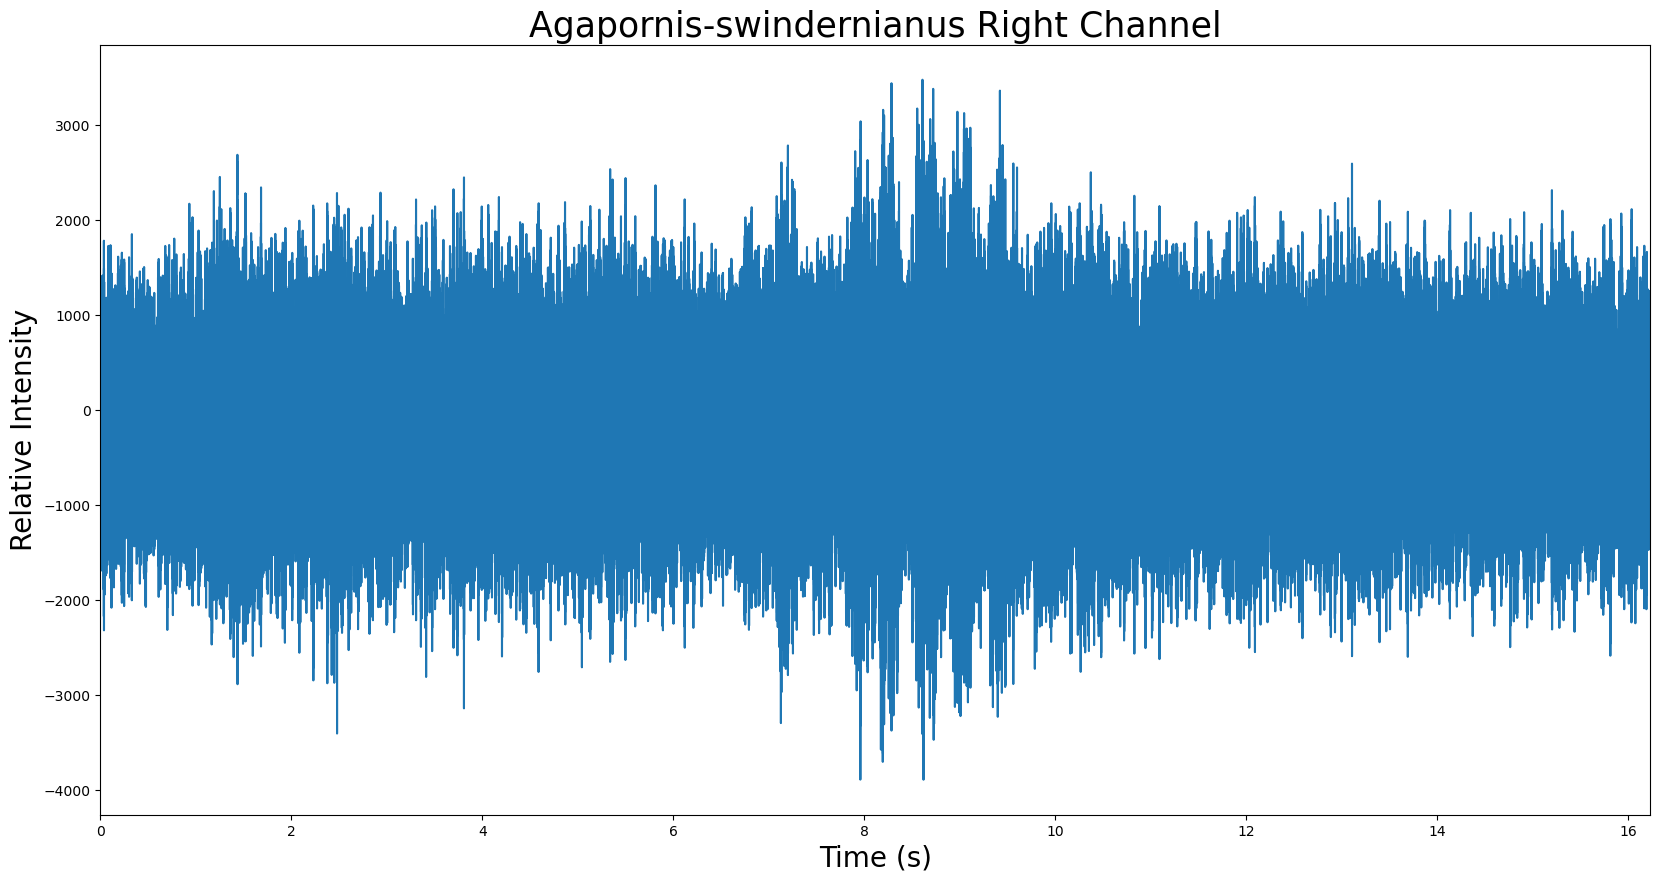

In [7]:
# plot right channel signal as function of time
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(tim_stp, r_chan)
plt.title('Agapornis-swindernianus Right Channel',
         fontsize=25)
plt.ylabel('Relative Intensity',
          fontsize=20)
plt.xlabel('Time (s)',
          fontsize=20)
plt.xlim(0, duration)
plt.show()

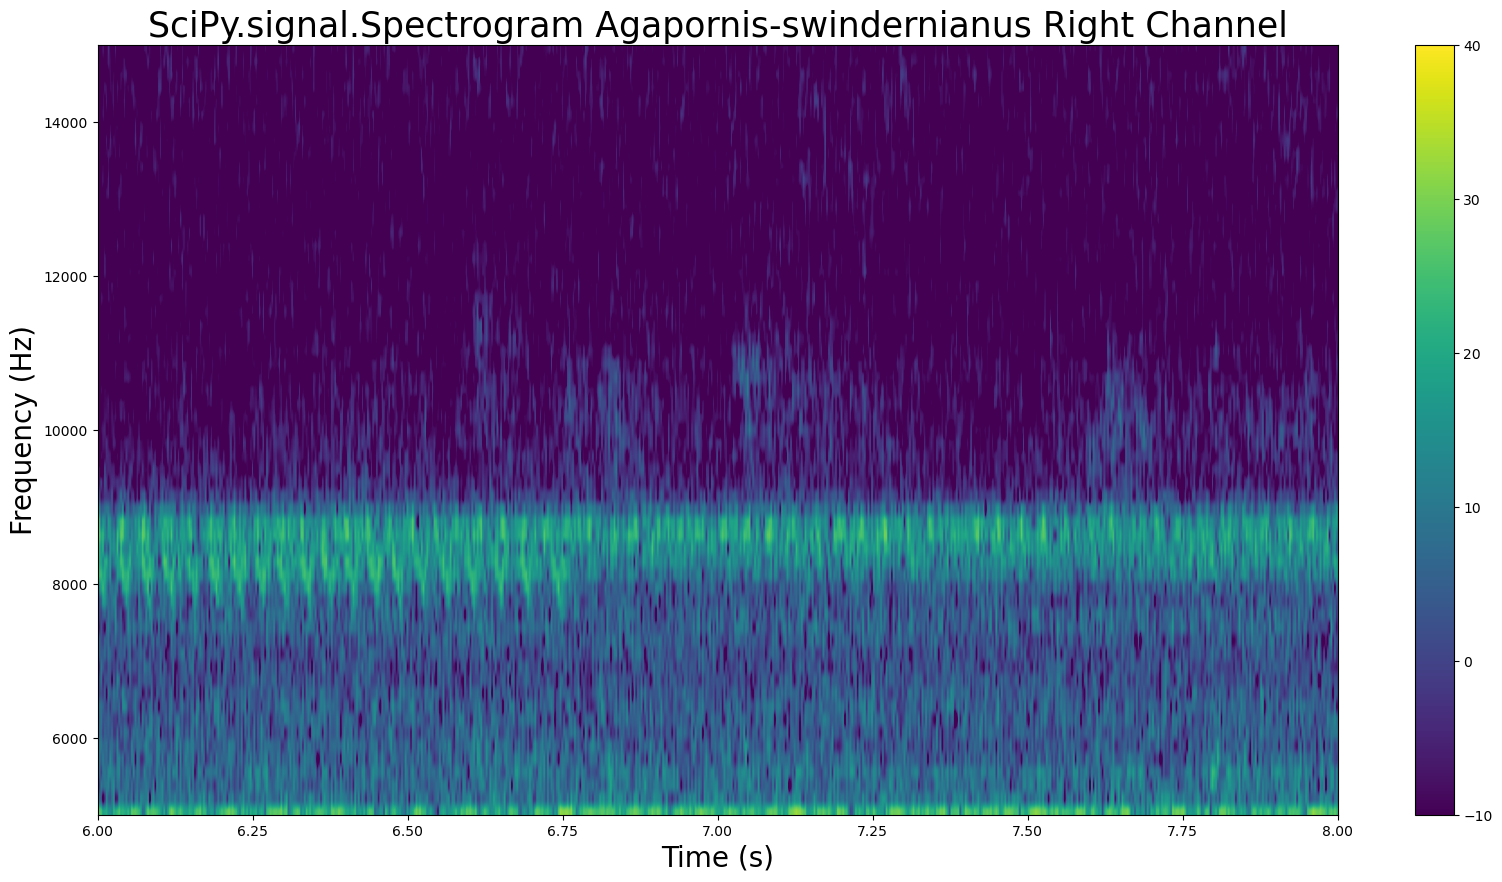

In [29]:
# plot spectrograph for comaprrison with FFT
plt.figure(figsize=(20,10))
plt.specgram(r_chan, Fs=sample_rate, vmin=-10, vmax=40)
plt.title('SciPy.signal.Spectrogram Agapornis-swindernianus Right Channel',
         fontsize=25)
plt.xlabel('Time (s)',
          fontsize=20)
plt.ylabel('Frequency (Hz)',
          fontsize=20)
plt.xlim(6, 8)
plt.ylim(5000,15000)
plt.colorbar()
plt.show()

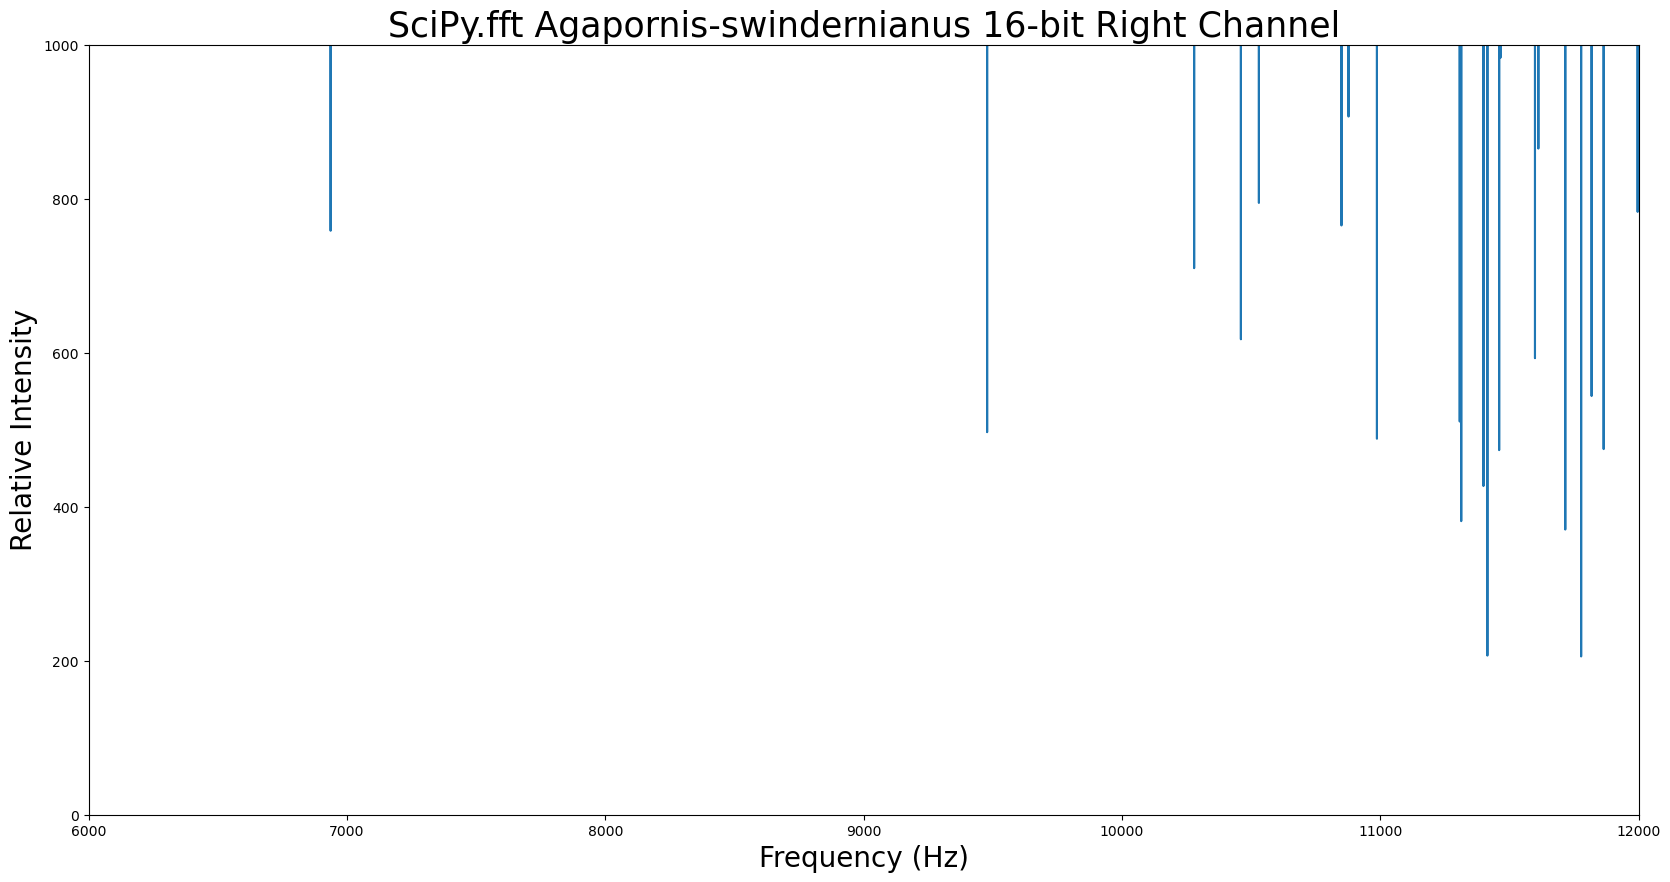

In [31]:
# plot FFT for comparrison to determine NR strategy
import scipy
from scipy.fft import fft, rfft, fftfreq, rfftfreq
yr = rfft(r_chan)
xr = rfftfreq(number_samples, 1/sample_rate)
plt.figure(figsize=(20,10))
plt.plot(xr, np.abs(yr))
plt.title('SciPy.fft Agapornis-swindernianus 16-bit Right Channel',
          fontsize=25)
plt.ylabel('Relative Intensity',
          fontsize=20)
plt.xlabel('Frequency (Hz)',
          fontsize=20)
plt.ylim(0, 0.01e)
plt.xlim(6000, 12000)
plt.show()

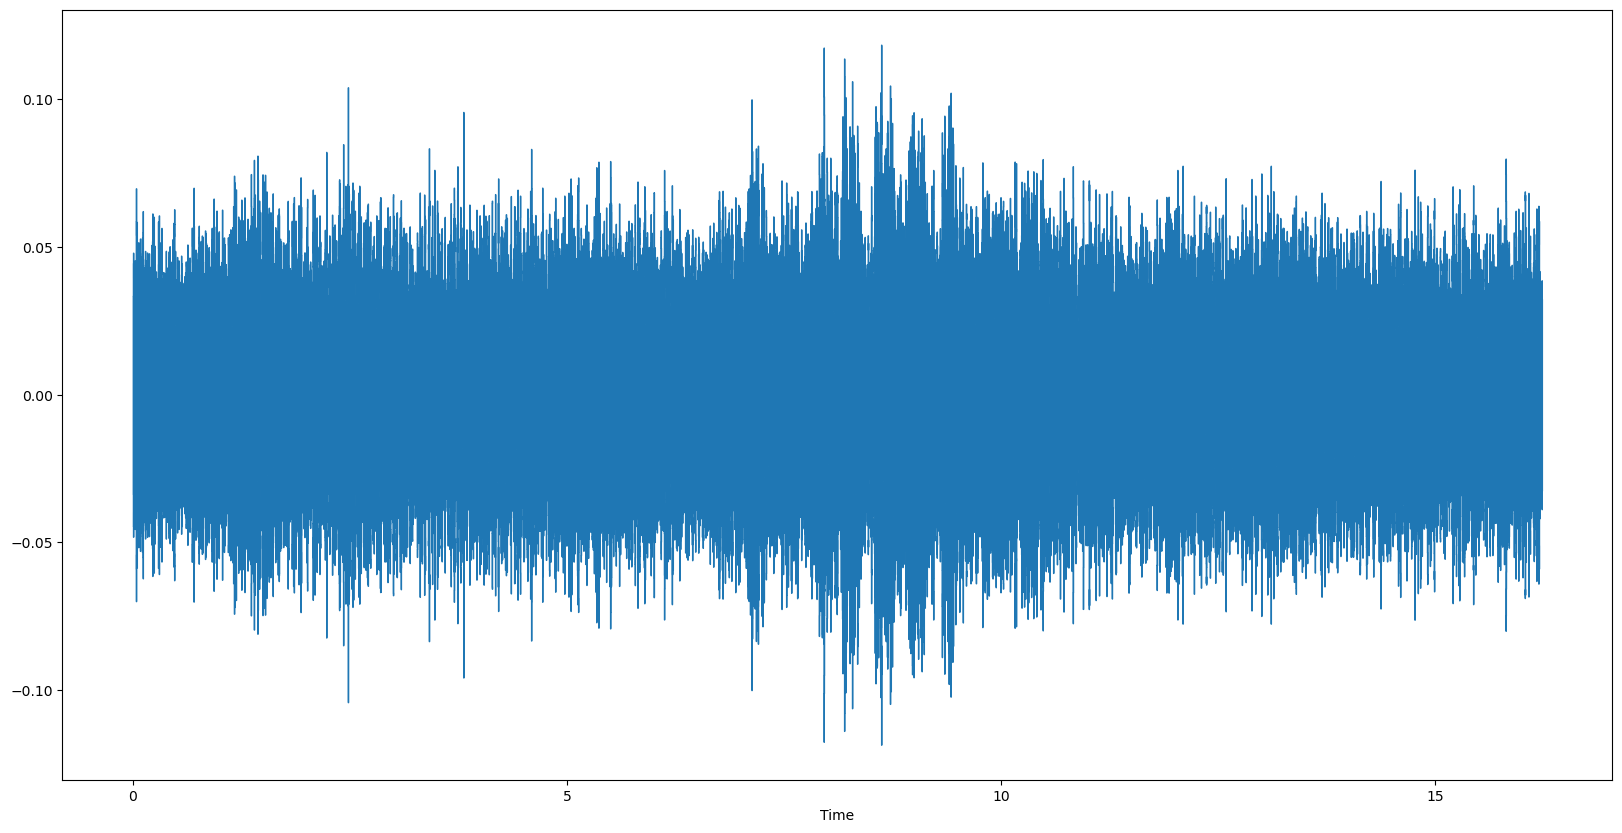

In [11]:
import librosa
import librosa.display

audio, sr = librosa.load('XC824126-Agapornis-swindernianus.mp3')
duration = librosa.get_duration(y=audio, sr=sr) #@static
plt.figure(figsize=(20,10))
librosa.display.waveshow(audio, sr=sr)

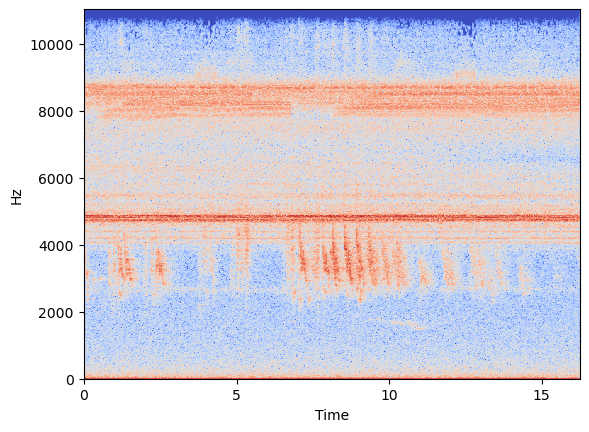

In [21]:
# using stft (linear) spectrogram
Ft = librosa.stft(audio)
FtdB = librosa.amplitude_to_db(abs(Ft))
librosa.display.specshow(
    FtdB, 
    sr=sr, 
    x_axis='time', 
    y_axis='hz')

In [27]:
# try mel spectrum from librosa package
librosa.show_versions()

# def wav_to_mel(wav):
#     """
#     compute mel-spectrum from
#     wav encoder
#     """
#     frame = librosa.feature.melspectrogram(
#         Fy = wav,
#         sr=sampling_rate,
#         N_fft = int16(sampling_rate * mel_window_length / 1000),
#         hop_length = int16(sampling_rate * mel_window_step / 1000),
#         num_mels = mel_n_channels)
#     return frames.astype(np.int16).T

# mel_spec = librosa.feature.melspectrogram(
#     audio, 
#     sr, 
#     n_fft=2048, 
#     hop_length=512, 
#     n_mels=10, 
#     fmax=8000)
        
# log_mel_spec = librosa.power_to_db(mel_spec)
# librosa.display(log_mel_spec, x_axis='time', y_axis='mel-bin', sr=sr)

INSTALLED VERSIONS
------------------
python: 3.11.5 (main, Sep 11 2023, 13:54:46) [GCC 11.2.0]

librosa: 0.10.1

audioread: 3.0.1
numpy: 1.24.3
scipy: 1.11.1
sklearn: 1.3.0
joblib: 1.2.0
decorator: 5.1.1
numba: 0.57.1
soundfile: 0.12.1
pooch: v1.8.0
soxr: 0.3.7
typing_extensions: installed, no version number available
lazy_loader: installed, no version number available
msgpack: installed, no version number available

numpydoc: 1.5.0
sphinx: 5.0.2
sphinx_rtd_theme: None
matplotlib: 3.7.2
sphinx_multiversion: None
sphinx_gallery: None
mir_eval: None
ipython: None
sphinxcontrib.rsvgconverter: None
pytest: 7.4.0
pytest_mpl: None
pytest_cov: None
samplerate: None
resampy: None
presets: None
packaging: 23.1
